In [7]:
import pandas as pd
import numpy as np

file_monthly  = r"monthly_data.csv"
file_monthly_return = r"monthly_return.csv"

# reading the files
df_monthly_factor = pd.read_csv(file_monthly)
df_monthly_return = pd.read_csv(file_monthly_return)

# sample data for exploration puposes
sample_monthly = df_monthly_factor.sample(100)
sample_monthly_return = df_monthly_return.sample(100)

C:\Users\Tristan\AppData\Local\Temp\ipykernel_12928\393384363.py:9: DtypeWarning: Columns (33,34,37,39,40,47,48,55,69,70) have mixed types. Specify dtype option on import or set low_memory=False.
  df_monthly_return = pd.read_csv(file_monthly_return)


## set date, year and month

In [8]:
# transform date field in datetime
df_monthly_factor["datetime_date"] = df_monthly_factor.public_date.apply( lambda x: pd.to_datetime(str(x)))
df_monthly_return["datetime_date"] =  df_monthly_return.datadate.apply(lambda x: pd.to_datetime(str(x)))
df_monthly_return["datetime_date_offset"] =  df_monthly_return["datetime_date"] - pd.DateOffset(months=1)
 
# Creating the month, year variable for later join
df_monthly_return["month"] =  df_monthly_return["datetime_date_offset"].apply(lambda x: x.month)
df_monthly_return["year"] =  df_monthly_return["datetime_date_offset"].apply(lambda x: x.year)
df_monthly_factor["month"] = df_monthly_factor["datetime_date"].apply(lambda x: x.month)
df_monthly_factor["year"] = df_monthly_factor["datetime_date"].apply(lambda x: x.year)

df_monthly_return.rename(columns =  {"GVKEY":"gvkey"},inplace = True)
merged_data = df_monthly_return.merge(df_monthly_factor, on = ["month","year","gvkey"])

## check for duplicated gvkeys and drop

In [9]:
# Group the data by "datetime" and "gvkey"
df_grouped = merged_data.groupby("datetime_date_x")

# Get the count of duplicates for each datetime
duplicates_per_datetime = df_grouped.apply(lambda x: x.gvkey.duplicated().sum())
print(duplicates_per_datetime)

datetime_date_x
1998-01-31    14
1998-02-28    14
1998-03-31    16
1998-04-30    16
1998-05-31    15
              ..
2021-09-30    14
2021-10-31    14
2021-11-30    14
2021-12-31    14
2022-01-31    14
Length: 289, dtype: int64


In [10]:
list_col = merged_data.columns

test_series = merged_data.groupby(["gvkey","public_date"])["PEG_trailing"].fillna(method = "bfill").reset_index()
list_columns = [ "gvkey",
                "month",
                "year",
                "datetime_date_x",
                "ggroup",
                "gsubind",
                "conm",
                "dpr",
                "PEG_trailing",
                "bm",
                "CAPEI",
                "divyield",
                "evm",
                "pcf",
                "pe_exi",
                "pe_inc",
                "pe_op_basic",
                "pe_op_dil",
                "ps",
                "ptb",
                "efftax",
                "GProf",
                "aftret_eq",
                "aftret_equity",
                "aftret_invcapx",
                "gpm",
                "npm",
                "opmad",
                "opmbd",
                "pretret_earnat",
                "pretret_noa",
                "ptpm",
                "roa",
                "roce",
                "roe",
               "capital_ratio",
                "equity_invcap",
                "debt_invcap",
                "totdebt_invcap",
                "invt_act",
                "rect_act",
                "fcf_ocf",
                "ocf_lct",
                "cash_debt",
                "cash_lt",
                "cfm",
                "short_debt",
                "profit_lct",
                "curr_debt",
                "debt_ebitda",
                "dltt_be",
                "int_debt",
                "int_totdebt",
                "lt_debt",
                "lt_ppent",
                "de_ratio",
                "debt_assets",
                "debt_at",
                "debt_capital",
                "intcov",
                "intcov_ratio",
                "cash_conversion",
                "cash_ratio",
                "curr_ratio",
                "quick_ratio",
                "at_turn",
                "inv_turn",
                "pay_turn",
                "rect_turn",
                "sale_equity",
                "sale_invcap",
                "sale_nwc",
                "accrual",
                "rd_sale",
                "adv_sale",
                "staff_sale",
                "cshoq",
                "cshtrm",
                "prccm",
                "prchm",
                "prclm",
                "trt1m"]

modeling_df =  merged_data[list_columns].copy()

In [11]:
# Just for checking duplicate gvkeys
pd.set_option('display.max_columns', None)
temp_df1 = df_monthly_return[df_monthly_return['gvkey']==1239]
temp_df1 = temp_df1.sort_values(["month", "year"])
temp_df1.head(6)

,gvkey,LINKPRIM,LIID,LINKTYPE,LPERMNO,LPERMCO,LINKDT,LINKENDDT,iid,datadate,tic,cusip,conm,ajexm,ajpm,isalrt,primiss,cheqvm,curcddvm,dvpspm,dvpsxm,dvrate,csfsm,cshtrm,curcdm,navm,prccm,prchm,prclm,trfm,trt1m,rawpm,rawxm,sph100,sphcusip,sphiid,sphmid,sphname,sphsec,sphtic,sphvg,cshoq,exchg,secstat,cik,fic,add1,add2,add3,add4,addzip,busdesc,city,conml,costat,county,dlrsn,ein,fax,fyrc,ggroup,gind,gsector,gsubind,idbflag,incorp,loc,naics,phone,prican,prirow,priusa,sic,spcindcd,spcseccd,spcsrc,state,stko,weburl,dldte,ipodate,datetime_date,datetime_date_offset,month,year
2604,1239,J,2,LC,69163,8127,19860423,20031105,2,19970228,ACV.A,013068200,ALBERTO-CULVER CO,1.0,1.0,NaN,J,NaN,USD,0.050,NaN,0.20,NaN,2299200.0,USD,NaN,23.875,25.875,22.2500,1.1382,7.0028,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,I,1368457.0,USA,2525 Armitage Avenue,NaN,NaN,NaN,60160,Alberto Culver Company was acquired by The Uni...,Melrose Park,Alberto-Culver Co,I,NaN,1.0,20-5196741,708 450 3394,9,3030,303020,30,30302010,D,DE,USA,325620,708 450 3000,NaN,NaN,1,2844,215.0,978.0,A-,IL,0.0,www.alberto.com,20110511.0,NaN,1997-02-28,1997-01-28,1,1997
2680,1239,P,1,LC,42083,8127,19650611,20110510,1,19970228,ACV.1,013078100,ALBERTO-CULVER CO,1.5,1.5,NaN,P,NaN,USD,0.050,NaN,0.20,NaN,2709300.0,USD,NaN,28.375,31.000,25.6250,2.0282,8.8729,2.0,2.0,NaN,013068101,215.0,500.0,Alberto-Culver,978.0,ACV,V,NaN,11,I,1368457.0,USA,2525 Armitage Avenue,NaN,NaN,NaN,60160,Alberto Culver Company was acquired by The Uni...,Melrose Park,Alberto-Culver Co,I,NaN,1.0,20-5196741,708 450 3394,9,3030,303020,30,30302010,D,DE,USA,325620,708 450 3000,NaN,NaN,1,2844,215.0,978.0,A-,IL,0.0,www.alberto.com,20110511.0,NaN,1997-02-28,1997-01-28,1,1997
2462,1239,P,1,LC,42083,8127,19650611,20110510,1,19980228,ACV.1,013078100,ALBERTO-CULVER CO,1.5,1.5,NaN,P,NaN,USD,0.060,NaN,0.24,NaN,2110700.0,USD,NaN,30.437,31.500,29.5620,2.0428,2.7409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,I,1368457.0,USA,2525 Armitage Avenue,NaN,NaN,NaN,60160,Alberto Culver Company was acquired by The Uni...,Melrose Park,Alberto-Culver Co,I,NaN,1.0,20-5196741,708 450 3394,9,3030,303020,30,30302010,D,DE,USA,325620,708 450 3000,NaN,NaN,1,2844,215.0,978.0,A-,IL,0.0,www.alberto.com,20110511.0,NaN,1998-02-28,1998-01-28,1,1998
2709,1239,J,2,LC,69163,8127,19860423,20031105,2,19980228,ACV.A,013068200,ALBERTO-CULVER CO,1.0,1.0,NaN,J,NaN,USD,0.060,NaN,0.24,NaN,1394300.0,USD,NaN,26.375,27.375,25.5000,1.1478,2.9268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,I,1368457.0,USA,2525 Armitage Avenue,NaN,NaN,NaN,60160,Alberto Culver Company was acquired by The Uni...,Melrose Park,Alberto-Culver Co,I,NaN,1.0,20-5196741,708 450 3394,9,3030,303020,30,30302010,D,DE,USA,325620,708 450 3000,NaN,NaN,1,2844,215.0,978.0,A-,IL,0.0,www.alberto.com,20110511.0,NaN,1998-02-28,1998-01-28,1,1998
2619,1239,J,2,LC,69163,8127,19860423,20031105,2,19990228,ACV.A,013068200,ALBERTO-CULVER CO,1.0,1.0,NaN,J,NaN,USD,0.065,0.065,0.26,NaN,568900.0,USD,NaN,21.750,23.750,21.3750,1.1597,-7.1702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,I,1368457.0,USA,2525 Armitage Avenue,NaN,NaN,NaN,60160,Alberto Culver Company was acquired by The Uni...,Melrose Park,Alberto-Culver Co,I,NaN,1.0,20-5196741,708 450 3394,9,3030,303020,30,30302010,D,DE,USA,325620,708 450 3000,NaN,NaN,1,2844,215.0,978.0,A-,IL,0.0,www.alberto.com,20110511.0,NaN,1999-02-28,1999-01-28,1,1999
2633,1239,P,1,LC,42083,8127,19650611,20110510,1,19990228,ACV.1,013078100,ALBERTO-CULVER CO,1.5,1.5,NaN,P,NaN,USD,0.065,0.065,0.26,NaN,1166300.0,USD,NaN,24.000,26.000,23.6875,2.0620,-6.5437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,I,1368457.0,USA,2525 Armitage Avenue,NaN,NaN,NaN,60160,Alberto Culver Company was acquired by The Uni...,Melrose Park,Alberto-Culver Co,I,NaN,1.0,20-5196741,708 450 3394,9,3030,303020,30,30302010,D,DE,USA,325620,708 450 3000,NaN,NaN,1,2844,215.0,978.0,A-,IL,0.0,www.alberto.com,20110511.0,NaN,1999-02-28,1999-01-28,1,1999


In [12]:
modeling_df.shape

(204537, 82)

## Backfill Imputation

In [13]:
list_replace_0 =  ["dpr","divyield"]
modeling_df = modeling_df.assign(divyield = modeling_df['divyield'].str.replace("%", "").astype(float) / 100)
modeling_df[list_replace_0] = modeling_df[list_replace_0].fillna(0)
modeling_df.sort_values(["gvkey","datetime_date_x"], ascending = True,inplace = True)

# Backfill missing values
modeling_df[list_columns] =  modeling_df.groupby(["gvkey"])[list_columns].fillna(method = "bfill")

## drop duplicated gvkeys based on market capitalization

In [14]:
# Calculate market capitalization
modeling_df['Market_Cap'] = modeling_df['cshoq'] * modeling_df['prccm']

In [15]:
modeling_df = modeling_df.sort_values(["datetime_date_x", "Market_Cap"], ascending=[True, False])
modeling_df = modeling_df.drop_duplicates(subset=["datetime_date_x", "gvkey"], keep="first")

In [16]:
# Group the data by "datetime" and "gvkey"
df_grouped = modeling_df.groupby("datetime_date_x")

# Get the count of duplicates for each datetime
duplicates_per_datetime = df_grouped.apply(lambda x: x.gvkey.duplicated().sum())
print(duplicates_per_datetime)

datetime_date_x
1998-01-31    0
1998-02-28    0
1998-03-31    0
1998-04-30    0
1998-05-31    0
             ..
2021-09-30    0
2021-10-31    0
2021-11-30    0
2021-12-31    0
2022-01-31    0
Length: 289, dtype: int64


## Imputation based on industries

<AxesSubplot:>

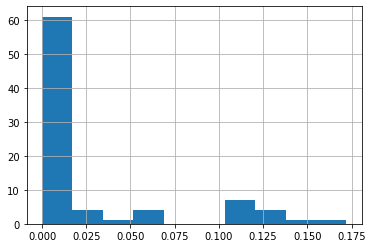

In [17]:
pd.set_option('display.max_rows', None)
# inspect remaining_missing
missing_val = modeling_df.isna().sum()/len(modeling_df)
missing_val.hist()

In [18]:
threshold_missing = 0.05
missing_df = modeling_df.isna().sum().reset_index()
missing_df.columns = ["name_var","missing_percentage"]
missing_df["missing_percentage"] = missing_df["missing_percentage"]/len(modeling_df)

list_to_na = list(missing_df[missing_df["missing_percentage"]>threshold_missing]["name_var"])
list_only_median = list(missing_df[(missing_df["missing_percentage"]<threshold_missing) & (missing_df["missing_percentage"]>0)]["name_var"])
len(list_only_median)
len(list_to_na)

17

In [19]:
# len(missing_df[missing_df["missing_percentage"] > threshold_missing]["name_var"])
# df_median = modeling_df.groupby(["year","month"])["rect_act"].median().reset_index()
# df_median.rename(columns= {"rect_act":"rect_act_median"},inplace = True)

# modeling_df["rect_act_median"] = modeling_df.merge(df_median, on= ["year","month"],how = "left")["rect_act_median"]
# modeling_df['rect_act'] = modeling_df['rect_act'].combine_first( modeling_df['rect_act_median'])
# modeling_df['rect_act'].isna().sum()

def assign_median(df_input,groupby_name, name_var):
    df_input[name_var] = modeling_df.groupby(groupby_name)[name_var].transform(lambda x: x.fillna(x.median()))

def create_missing_col(dataframe_input,list_var):
    for var in list_var:
        print(var)
        var_missing_id = var+"_missing"
        dataframe_input[var_missing_id] = dataframe_input[var].isna().astype(int)
        assign_median(dataframe_input,["year","month"],var)

In [20]:
# replacing with industry median       
for var in list_only_median:
    assign_median(modeling_df,["year","month","ggroup"],var)

# replacing with median & creating a missing covariate
create_missing_col(modeling_df,list_to_na)

# validating that we have no missing left
modeling_df.isna().sum()

d:\Software\Python\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\Software\Python\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\Software\Python\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\Software\Python\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\Software\Python\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\Software\Python\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\Software\Python\lib\site-

pretret_earnat
pretret_noa
invt_act
rect_act
ocf_lct
profit_lct
curr_debt
int_debt
int_totdebt
intcov
intcov_ratio
cash_conversion
cash_ratio
curr_ratio
quick_ratio
inv_turn
sale_nwc


gvkey                        0
month                        0
year                         0
datetime_date_x              0
ggroup                       0
gsubind                      0
conm                         0
dpr                          0
PEG_trailing                20
bm                           0
CAPEI                        0
divyield                     0
evm                          0
pcf                          0
pe_exi                       0
pe_inc                       0
pe_op_basic                  0
pe_op_dil                    0
ps                           0
ptb                          0
efftax                       0
GProf                        0
aftret_eq                    0
aftret_equity                0
aftret_invcapx               0
gpm                          0
npm                          0
opmad                        0
opmbd                        0
pretret_earnat               0
pretret_noa                  0
ptpm                         0
roa     

In [24]:
threshold_missing = 0.05
missing_df = modeling_df.isna().sum().reset_index()
missing_df.columns = ["name_var","missing_percentage"]
missing_df["missing_percentage"] = missing_df["missing_percentage"]/len(modeling_df)

list_to_na = list(missing_df[missing_df["missing_percentage"]>threshold_missing]["name_var"])
list_only_median = list(missing_df[(missing_df["missing_percentage"]<threshold_missing) & (missing_df["missing_percentage"]>0)]["name_var"])
len(list_only_median)
len(list_to_na)

0

In [25]:
len(list_only_median)

3

In [26]:
# replacing with market median       
for var in list_only_median:
    assign_median(modeling_df,["year","month"],var)

# replacing with median & creating a missing covariate
create_missing_col(modeling_df,list_to_na)

# validating that we have no missing left
modeling_df.isna().sum()

gvkey                      0
month                      0
year                       0
datetime_date_x            0
ggroup                     0
gsubind                    0
conm                       0
dpr                        0
PEG_trailing               0
bm                         0
CAPEI                      0
divyield                   0
evm                        0
pcf                        0
pe_exi                     0
pe_inc                     0
pe_op_basic                0
pe_op_dil                  0
ps                         0
ptb                        0
efftax                     0
GProf                      0
aftret_eq                  0
aftret_equity              0
aftret_invcapx             0
gpm                        0
npm                        0
opmad                      0
opmbd                      0
pretret_earnat             0
pretret_noa                0
ptpm                       0
roa                        0
roce                       0
roe           

In [27]:
modeling_df['sale_nwc_missing'].value_counts()

0    165984
1     34504
Name: sale_nwc_missing, dtype: int64

In [45]:
# Recalculate market capitalization
modeling_df['Market_Cap2'] = modeling_df['cshoq'] * modeling_df['prccm']

In [29]:
modeling_df.head()

,gvkey,month,year,datetime_date_x,ggroup,gsubind,conm,dpr,PEG_trailing,bm,CAPEI,divyield,evm,pcf,pe_exi,pe_inc,pe_op_basic,pe_op_dil,ps,ptb,efftax,GProf,aftret_eq,aftret_equity,aftret_invcapx,gpm,npm,opmad,opmbd,pretret_earnat,pretret_noa,ptpm,roa,roce,roe,capital_ratio,equity_invcap,debt_invcap,totdebt_invcap,invt_act,rect_act,fcf_ocf,ocf_lct,cash_debt,cash_lt,cfm,short_debt,profit_lct,curr_debt,debt_ebitda,dltt_be,int_debt,int_totdebt,lt_debt,lt_ppent,de_ratio,debt_assets,debt_at,debt_capital,intcov,intcov_ratio,cash_conversion,cash_ratio,curr_ratio,quick_ratio,at_turn,inv_turn,pay_turn,rect_turn,sale_equity,sale_invcap,sale_nwc,accrual,rd_sale,adv_sale,staff_sale,cshoq,cshtrm,prccm,prchm,prclm,trt1m,Market_Cap,pretret_earnat_missing,pretret_noa_missing,invt_act_missing,rect_act_missing,ocf_lct_missing,profit_lct_missing,curr_debt_missing,int_debt_missing,int_totdebt_missing,intcov_missing,intcov_ratio_missing,cash_conversion_missing,cash_ratio_missing,curr_ratio_missing,quick_ratio_missing,inv_turn_missing,sale_nwc_missing
113790,12141,12,1997,1998-01-31,4510,45103020,MICROSOFT CORP,0.013,0.009,0.066,89.914,0.0000,20.863,27.928,6.074,6.074,5.458,53.897,12.795,14.880,0.350,0.851,0.411,0.374,0.374,0.962,0.287,0.464,0.515,0.506,0.710,0.457,0.497,0.667,0.413,0.000,0.904,0.000,0.000,0.000,0.086,0.907,1.581,1.299,2.607,0.338,0.000,1.777,1.000,0.000,0.000,212.000,212.000,0.000,2.505,0.345,0.256,0.000,0.072,167.802,226.462,9.839,2.607,2.963,2.963,0.884,12.413,0.582,13.514,1.189,1.189,1.758,-0.158,0.169,0.000,0.000,2454.000,185797000.0,149.187,150.125,124.375,15.4251,366104.898000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44780,5047,12,1997,1998-01-31,2010,20105010,GENERAL ELECTRIC CO,0.419,2.452,0.193,40.288,0.0164,20.373,14.539,82.910,82.910,80.854,107.929,2.776,5.598,0.318,0.057,0.257,0.257,0.102,0.184,0.092,0.138,0.184,0.013,0.023,0.137,0.059,0.075,0.202,0.599,0.386,0.577,1.588,0.180,0.306,0.506,0.159,0.075,0.016,0.137,0.637,0.153,0.429,8.225,1.173,0.014,0.005,0.196,8.129,7.623,0.874,0.472,0.816,12.596,17.452,502.974,0.038,1.307,1.216,0.313,9.459,5.760,0.709,2.727,1.051,2.462,-0.032,0.016,0.000,0.000,3258.023,94294000.0,77.500,77.875,70.250,5.6218,252496.782500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
104481,10984,12,1997,1998-01-31,5010,50102010,SPRINT CORP,0.391,0.384,0.464,23.828,0.0171,5.698,6.270,25.379,25.379,12.163,25.313,1.379,2.018,0.377,0.425,0.116,0.116,0.103,0.499,0.069,0.167,0.281,0.165,0.210,0.113,0.243,0.206,0.106,0.250,0.749,0.250,0.275,0.056,0.652,0.138,0.989,0.285,0.081,0.183,0.090,1.264,0.387,0.782,0.302,0.096,0.087,0.348,0.778,0.957,0.489,0.187,0.321,4.588,8.700,29.785,0.209,1.234,1.165,0.852,32.433,7.956,5.591,1.667,1.250,19.226,-0.129,0.000,0.000,0.000,3931.000,18059000.0,59.562,61.937,55.250,1.5983,234138.222000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23935,3144,12,1997,1998-01-31,3020,30201030,COCA-COLA CO,0.324,2.036,0.051,58.708,0.0084,28.034,38.689,40.663,40.663,22.683,45.625,8.847,21.434,0.240,0.764,0.621,0.621,0.552,0.700,0.219,0.265,0.289,0.485,1.872,0.320,0.323,0.460,0.597,0.127,0.873,0.127,0.494,0.158,0.265,0.746,0.561,0.346,0.216,0.249,0.743,0.709,0.742,0.717,0.139,0.266,0.068,0.097,2.785,1.501,0.600,0.226,0.504,16.432,18.689,32.442,0.291,0.872,0.735,1.093,5.348,1.813,10.597,2.733,2.387,1778.550,-0.011,0.000,0.077,0.000,2470.760,62365000.0,64.750,67.000,62.250,-2.9046,159981.710000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38717,4503,12,1997,1998-01-31,1010,10102010,EXXON MOBIL CORP,0.478,0.789,0.274,24.746,0.0268,8.820,10.074,18.156,18.156,9.457,25.503,1.233,3.480,0.358,0.273,0.195,0.196,0.173,0.214,0.069,0.096,0.140,0.137,0.176,0.112,0.181,0.222,0.182,0.142,0.850,0.140,0.191,0.249,0.486,0.452,0.772,0.263,0.086,0.113,0.266,0.885,0.375,0.570,0.153,0.062,0.045,0.139,0.782,1.187,0.540,0.102,0.343,20.043,26.505,1.276,0.229,1.084,0.814,1.277,18.351,7.433,11.966,2.807,2.387,83.138,-0.068,0.004,0.000,0.049,2446.792,74799000.0,59.312,62.187,56.625,-3.0644,145124.127104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
modeling_df['gsubind'].nunique()

149

In [31]:
df_monthly_factor.groupby('datetime_date')['gvkey'].nunique()

datetime_date
1997-12-31    811
1998-01-31    813
1998-02-28    814
1998-03-31    815
1998-04-30    814
1998-05-31    814
1998-06-30    814
1998-07-31    813
1998-08-31    813
1998-09-30    811
1998-10-31    808
1998-11-30    806
1998-12-31    804
1999-01-31    802
1999-02-28    801
1999-03-31    800
1999-04-30    800
1999-05-31    799
1999-06-30    797
1999-07-31    795
1999-08-31    796
1999-09-30    794
1999-10-31    789
1999-11-30    788
1999-12-31    783
2000-01-31    787
2000-02-29    785
2000-03-31    787
2000-04-30    786
2000-05-31    785
2000-06-30    780
2000-07-31    778
2000-08-31    782
2000-09-30    782
2000-10-31    781
2000-11-30    779
2000-12-31    776
2001-01-31    773
2001-02-28    772
2001-03-31    772
2001-04-30    771
2001-05-31    771
2001-06-30    769
2001-07-31    768
2001-08-31    771
2001-09-30    767
2001-10-31    768
2001-11-30    766
2001-12-31    766
2002-01-31    767
2002-02-28    767
2002-03-31    765
2002-04-30    767
2002-05-31    768
2002-06-30    

In [32]:
modeling_df.groupby('datetime_date_x')['gvkey'].nunique()

datetime_date_x
1998-01-31    809
1998-02-28    811
1998-03-31    813
1998-04-30    814
1998-05-31    812
1998-06-30    812
1998-07-31    811
1998-08-31    811
1998-09-30    811
1998-10-31    804
1998-11-30    806
1998-12-31    803
1999-01-31    800
1999-02-28    800
1999-03-31    798
1999-04-30    798
1999-05-31    797
1999-06-30    797
1999-07-31    792
1999-08-31    792
1999-09-30    792
1999-10-31    787
1999-11-30    787
1999-12-31    782
2000-01-31    778
2000-02-29    784
2000-03-31    784
2000-04-30    783
2000-05-31    782
2000-06-30    778
2000-07-31    779
2000-08-31    776
2000-09-30    779
2000-10-31    780
2000-11-30    776
2000-12-31    770
2001-01-31    774
2001-02-28    768
2001-03-31    768
2001-04-30    770
2001-05-31    770
2001-06-30    768
2001-07-31    768
2001-08-31    766
2001-09-30    765
2001-10-31    765
2001-11-30    766
2001-12-31    764
2002-01-31    764
2002-02-28    765
2002-03-31    765
2002-04-30    764
2002-05-31    766
2002-06-30    764
2002-07-31  

## Standardization

In [46]:
# Standardization
def assign_standardize(df_input,groupby_name, name_var):
    df_input[name_var] = modeling_df.groupby(groupby_name)[name_var].transform(lambda x: (x - x.mean()) / x.std())

list_columns = ["PEG_trailing",
                "bm",
                "CAPEI",
                "evm",
                "pcf",
                "pe_exi",
                "pe_inc",
                "pe_op_basic",
                "pe_op_dil",
                "ps",
                "ptb",
                "efftax",
                "GProf",
                "aftret_eq",
                "aftret_equity",
                "aftret_invcapx",
                "gpm",
                "npm",
                "opmad",
                "opmbd",
                "pretret_earnat",
                "pretret_noa",
                "ptpm",
                "roa",
                "roce",
                "roe",
                "capital_ratio",
                "equity_invcap",
                "debt_invcap",
                "totdebt_invcap",
                "invt_act",
                "rect_act",
                "fcf_ocf",
                "ocf_lct",
                "cash_debt",
                "cash_lt",
                "cfm",
                "short_debt",
                "profit_lct",
                "curr_debt",
                "debt_ebitda",
                "dltt_be",
                "int_debt",
                "int_totdebt",
                "lt_debt",
                "lt_ppent",
                "de_ratio",
                "debt_assets",
                "debt_at",
                "debt_capital",
                "intcov",
                "intcov_ratio",
                "cash_conversion",
                "cash_ratio",
                "curr_ratio",
                "quick_ratio",
                "at_turn",
                "inv_turn",
                "pay_turn",
                "rect_turn",
                "sale_equity",
                "sale_invcap",
                "sale_nwc",
                "accrual",
                "rd_sale",
                "adv_sale",
                "staff_sale",
                "cshoq",
                "cshtrm",
                "prccm",
                "prchm",
                "prclm",
                "Market_Cap"]
    
modeling_df_std = modeling_df.copy()

for var in list_columns:
    assign_standardize(modeling_df_std,["year","month"],var)

In [47]:
def assign_standardize_div(df_input,groupby_name, name_var):
    df_temp = df_input[df_input[name_var] != 0].copy()
    df_temp[name_var] = df_temp.groupby(groupby_name)[name_var].transform(lambda x: (x - x.mean()) / x.std())
    df_input.update(df_temp)

for var in ["divyield", "dpr"]:
    assign_standardize_div(modeling_df_std,["year","month"], var)

In [48]:
modeling_df_std.head()

,gvkey,month,year,datetime_date_x,ggroup,gsubind,conm,dpr,PEG_trailing,bm,CAPEI,divyield,evm,pcf,pe_exi,pe_inc,pe_op_basic,pe_op_dil,ps,ptb,efftax,GProf,aftret_eq,aftret_equity,aftret_invcapx,gpm,npm,opmad,opmbd,pretret_earnat,pretret_noa,ptpm,roa,roce,roe,capital_ratio,equity_invcap,debt_invcap,totdebt_invcap,invt_act,rect_act,fcf_ocf,ocf_lct,cash_debt,cash_lt,cfm,short_debt,profit_lct,curr_debt,debt_ebitda,dltt_be,int_debt,int_totdebt,lt_debt,lt_ppent,de_ratio,debt_assets,debt_at,debt_capital,intcov,intcov_ratio,cash_conversion,cash_ratio,curr_ratio,quick_ratio,at_turn,inv_turn,pay_turn,rect_turn,sale_equity,sale_invcap,sale_nwc,accrual,rd_sale,adv_sale,staff_sale,cshoq,cshtrm,prccm,prchm,prclm,trt1m,Market_Cap,pretret_earnat_missing,pretret_noa_missing,invt_act_missing,rect_act_missing,ocf_lct_missing,profit_lct_missing,curr_debt_missing,int_debt_missing,int_totdebt_missing,intcov_missing,intcov_ratio_missing,cash_conversion_missing,cash_ratio_missing,curr_ratio_missing,quick_ratio_missing,inv_turn_missing,sale_nwc_missing,Market_Cap2
113790,12141.0,12.0,1997.0,1998-01-31,4510.0,45103020.0,MICROSOFT CORP,-0.136201,-0.374484,-1.043796,0.096296,0.000000,0.490764,0.237966,-0.206811,-0.244632,-0.157267,0.597788,1.931492,2.044186,-0.037844,1.715301,0.217090,0.332884,1.090092,0.981644,0.437771,0.579882,0.572501,2.364146,-0.007802,0.649342,2.553025,1.094581,0.256798,-1.306895,0.865357,-1.290417,-0.691298,-1.366821,-1.783296,0.041505,1.584262,2.770535,1.884147,0.423367,-0.956152,1.225232,2.155684,-0.703674,-0.347215,4.344647,28.361011,-1.378149,-0.228481,-0.385721,-1.534911,-1.366330,-1.559083,0.222771,0.206593,-0.048410,1.311394,0.641893,0.961828,-0.203738,-0.131724,-0.617382,-0.022251,-0.111994,-0.368147,-0.059596,-1.310569,0.245249,-0.343875,-0.454546,6.364959,5.226355,0.023601,0.022321,0.016344,15.4251,13.863150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.861857
44780,5047.0,12.0,1997.0,1998-01-31,2010.0,20105010.0,GENERAL ELECTRIC CO,-0.040205,0.094619,-0.635260,0.045579,-0.183863,0.466646,-0.028129,0.999424,1.214872,0.921947,1.615259,0.005198,0.216766,-0.059749,-1.015842,0.123413,0.182876,-0.072740,-0.280916,0.089237,0.026531,0.012475,-1.079477,-0.049652,0.088386,-0.773667,-0.229201,0.094459,1.071134,-0.919789,1.003352,1.551635,-0.469049,-0.517378,0.039395,-0.611837,-0.376410,-0.325458,0.060040,1.325966,-0.839196,-0.297489,1.921302,0.104351,-0.044899,-0.047457,-0.458803,-0.137567,0.621143,1.306196,1.380819,1.288264,-0.077782,-0.084369,-0.047209,-0.363708,-0.373408,-0.125038,-0.910629,-0.174964,-0.257644,-0.227393,-0.066377,-0.448351,-0.059000,0.178746,-0.098726,-0.343875,-0.454546,8.648120,2.376577,-0.016965,-0.018403,-0.017293,5.6218,9.423036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.422019
104481,10984.0,12.0,1997.0,1998-01-31,5010.0,50102010.0,SPRINT CORP,-0.046826,-0.302476,0.236498,0.028757,-0.131636,-0.255657,-0.192468,0.096255,0.122068,-0.061292,0.059526,-0.263395,-0.488056,-0.019362,0.249977,0.037644,0.002097,-0.068465,0.230275,0.048128,0.075755,0.176592,-0.017752,-0.038261,0.046314,0.623848,0.063731,0.020598,-0.314395,0.331191,-0.296583,-0.302881,-1.087515,1.473566,0.037460,0.669993,0.163507,-0.270026,0.143189,-0.633718,0.573107,-0.477933,-0.454101,-0.230955,-0.043201,-0.036469,0.254159,-0.256398,-0.301055,-0.463749,-0.277947,-0.606140,-0.093290,-0.096552,-0.048361,-0.252208,-0.418164,-0.156767,-0.243354,0.161324,-0.105078,-0.149181,-0.097816,-0.332694,-0.044825,-0.967790,-0.134698,-0.343875,-0.454546,10.559154,0.002308,-0.027115,-0.027387,-0.026615,1.5983,8.705534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.704562
23935,3144.0,12.0,1997.0,1998-01-31,3020.0,30201030.0,COCA-COLA CO,-0.062667,0.014739,-1.092048,0.064404,-0.780745,0.843720,0.451831,0.336196,0.412388,0.089290,0.442019,1.172434,3.334523,-0.113141,1.416045,0.344832,0.649568,1.851063,0.556463,0.316231,0.242100,0.190127,2.217460,0.062983,0.409183,1.231463,0.631705,0.398364,-0.80

In [36]:
modeling_df_std.loc[modeling_df_std['ggroup'] == 1010, 'ggroup'] = 'Energy'
modeling_df_std.loc[modeling_df_std['ggroup'] == 1510, 'ggroup'] = 'Materials'
modeling_df_std.loc[modeling_df_std['ggroup'] == 2010, 'ggroup'] = 'Capital Goods'
modeling_df_std.loc[modeling_df_std['ggroup'] == 2020, 'ggroup'] = 'Commercial & Professional Services'
modeling_df_std.loc[modeling_df_std['ggroup'] == 2030, 'ggroup'] = 'Transportation'
modeling_df_std.loc[modeling_df_std['ggroup'] == 2510, 'ggroup'] = 'Automobiles & Components'
modeling_df_std.loc[modeling_df_std['ggroup'] == 2520, 'ggroup'] = 'Consumer Durables & Apparel'
modeling_df_std.loc[modeling_df_std['ggroup'] == 2530, 'ggroup'] = 'Consumer Services'
modeling_df_std.loc[modeling_df_std['ggroup'] == 2540, 'ggroup'] = 'Media'
modeling_df_std.loc[modeling_df_std['ggroup'] == 2550, 'ggroup'] = 'Retailing'
modeling_df_std.loc[modeling_df_std['ggroup'] == 3010, 'ggroup'] = 'Food & Staples Retailing'
modeling_df_std.loc[modeling_df_std['ggroup'] == 3020, 'ggroup'] = 'Food, Beverage & Tobacco'
modeling_df_std.loc[modeling_df_std['ggroup'] == 3030, 'ggroup'] = 'Household & Personal Products'
modeling_df_std.loc[modeling_df_std['ggroup'] == 3510, 'ggroup'] = 'Health Care Equipment & Services'
modeling_df_std.loc[modeling_df_std['ggroup'] == 3520, 'ggroup'] = 'Pharmaceuticals, Biotechnology & Life Sciences'
modeling_df_std.loc[modeling_df_std['ggroup'] == 4010, 'ggroup'] = 'Banks'
modeling_df_std.loc[modeling_df_std['ggroup'] == 4020, 'ggroup'] = 'Diversified Financials'
modeling_df_std.loc[modeling_df_std['ggroup'] == 4030, 'ggroup'] = 'Insurance'
modeling_df_std.loc[modeling_df_std['ggroup'] == 4510, 'ggroup'] = 'Software & Services'
modeling_df_std.loc[modeling_df_std['ggroup'] == 4520, 'ggroup'] = 'Technology Hardware & Equipment'
modeling_df_std.loc[modeling_df_std['ggroup'] == 4530, 'ggroup'] = 'Semiconductors & Semiconductor Equipment'
modeling_df_std.loc[modeling_df_std['ggroup'] == 5010, 'ggroup'] = 'Telecommunication Services'
modeling_df_std.loc[modeling_df_std['ggroup'] == 5020, 'ggroup'] = 'Media & Entertainment'
modeling_df_std.loc[modeling_df_std['ggroup'] == 5510, 'ggroup'] = 'Utilities'
modeling_df_std.loc[modeling_df_std['ggroup'] == 6010, 'ggroup'] = 'Real Estate'

In [37]:
modeling_df_std['gsubind'].nunique()
# maybe not choosing this one 

149

In [43]:
list_variable_non_macro = [ 'dpr',
 'PEG_trailing',
 'bm',
 'CAPEI',
 'divyield',
 'evm',
 'pcf',
 'pe_exi',
 'pe_inc',
 'pe_op_basic',
 'pe_op_dil',
 'ps',
 'ptb',
 'efftax',
 'GProf',
 'aftret_eq',
 'aftret_equity',
 'aftret_invcapx',
 'gpm',
 'npm',
 'opmad',
 'opmbd',
 'pretret_earnat',
 'pretret_noa',
 'ptpm',
 'roa',
 'roce',
 'roe',
 'capital_ratio',
 'equity_invcap',
 'debt_invcap',
 'totdebt_invcap',
 'invt_act',
 'rect_act',
 'fcf_ocf',
 'ocf_lct',
 'cash_debt',
 'cash_lt',
 'cfm',
 'short_debt',
 'profit_lct',
 'curr_debt',
 'debt_ebitda',
 'dltt_be',
 'int_debt',
 'int_totdebt',
 'lt_debt',
 'lt_ppent',
 'de_ratio',
 'debt_assets',
 'debt_at',
 'debt_capital',
 'intcov',
 'intcov_ratio',
 'cash_conversion',
 'cash_ratio',
 'curr_ratio',
 'quick_ratio',
 'at_turn',
 'inv_turn',
 'pay_turn',
 'rect_turn',
 'sale_equity',
 'sale_invcap',
 'sale_nwc',
 'accrual',
 'rd_sale',
 'adv_sale',
 'staff_sale',
 'cshoq',
 'cshtrm',
 'prccm',
 'prchm',
 'prclm',
 'Market_Cap',
 'pretret_earnat_missing',
 'pretret_noa_missing',
 'invt_act_missing',
 'rect_act_missing',
 'ocf_lct_missing',
 'profit_lct_missing',
 'curr_debt_missing',
 'int_debt_missing',
 'int_totdebt_missing',
 'intcov_missing',
 'intcov_ratio_missing',
 'cash_conversion_missing',
 'cash_ratio_missing',
 'curr_ratio_missing',
 'quick_ratio_missing',
 'inv_turn_missing',
 'sale_nwc_missing']

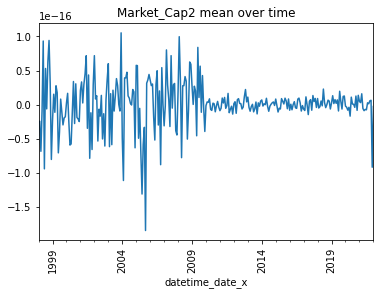

In [49]:
modeling_df_std.groupby("datetime_date_x")['Market_Cap2'].mean().plot(rot=90,title = 'Market_Cap2' + " mean over time")
plt.show()

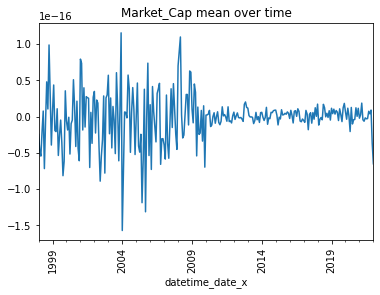

In [50]:
modeling_df_std.groupby("datetime_date_x")['Market_Cap'].mean().plot(rot=90,title = 'Market_Cap' + " mean over time")
plt.show()

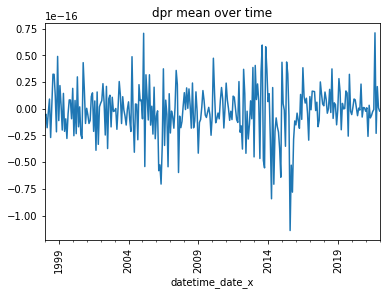

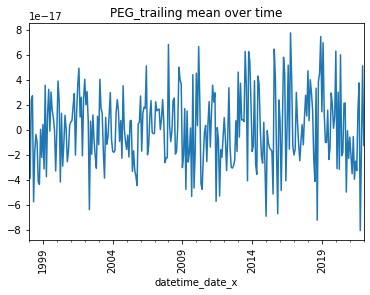

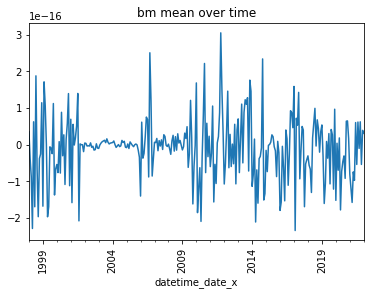

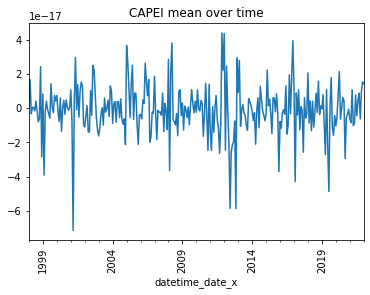

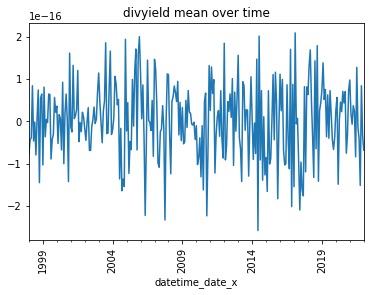

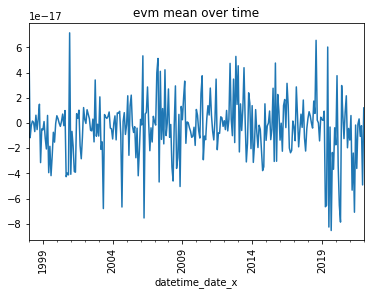

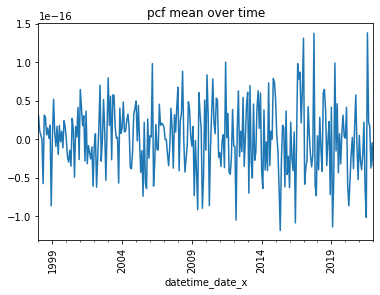

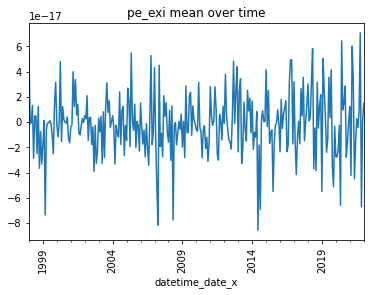

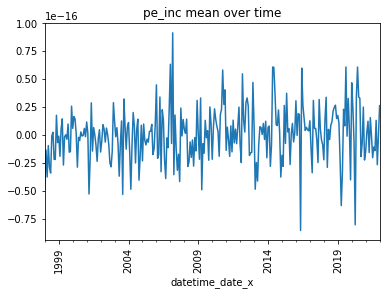

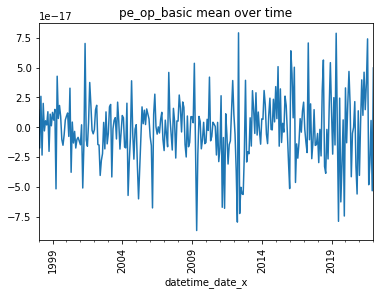

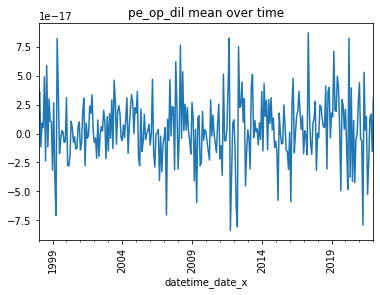

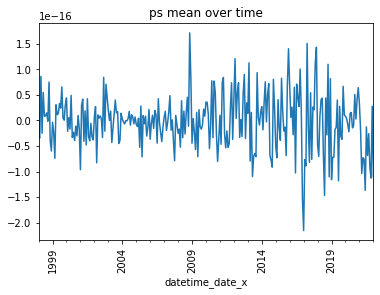

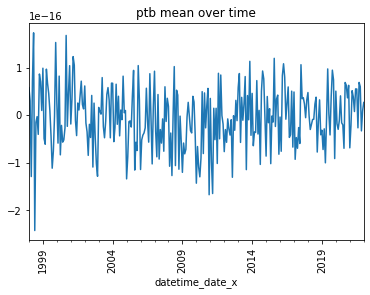

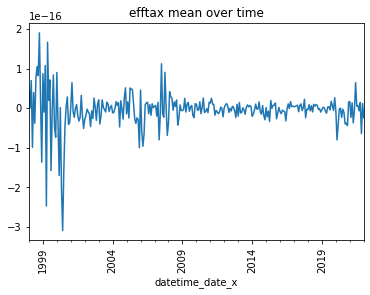

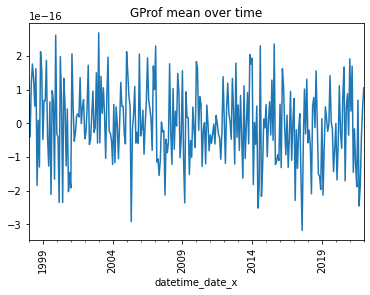

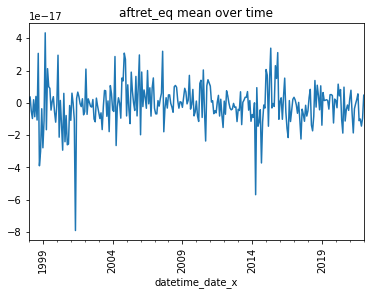

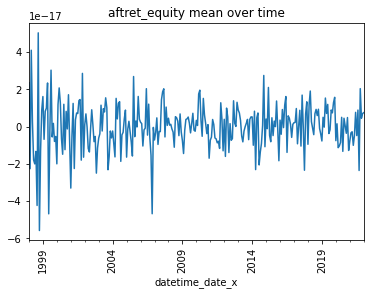

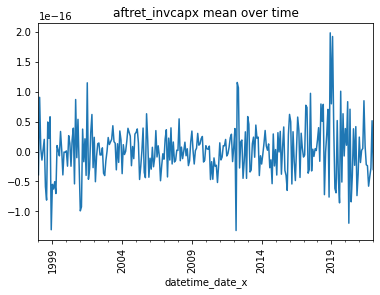

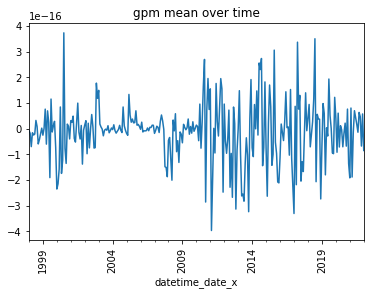

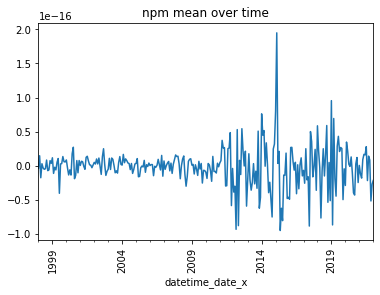

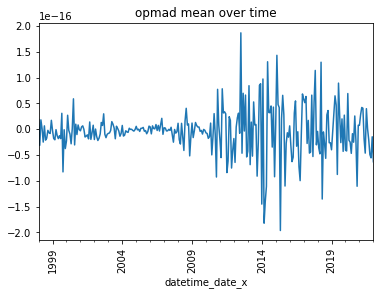

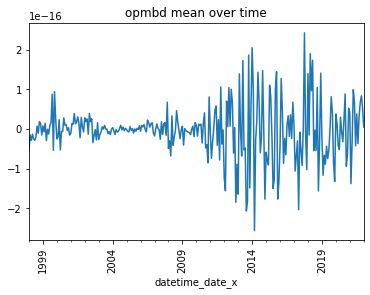

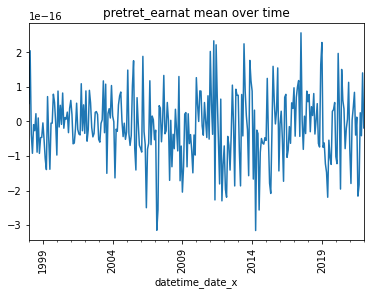

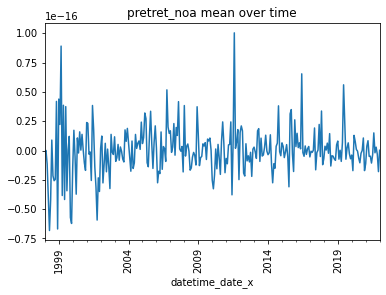

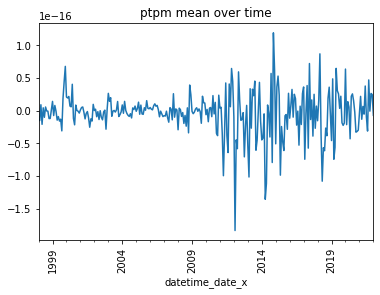

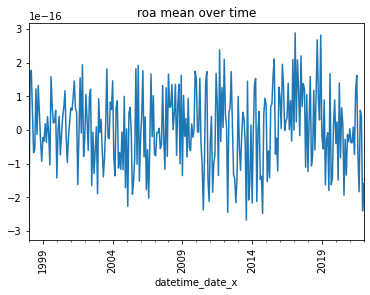

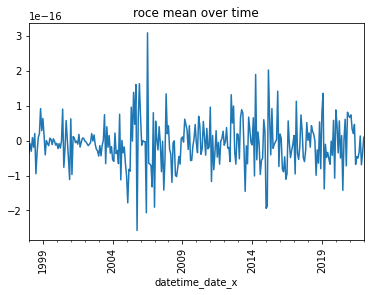

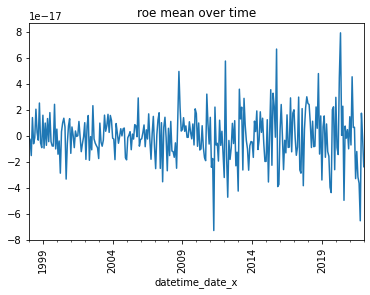

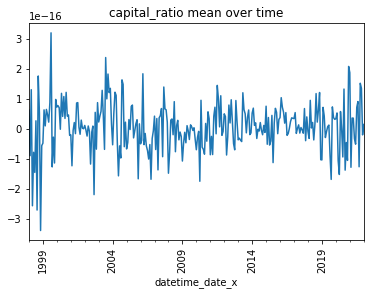

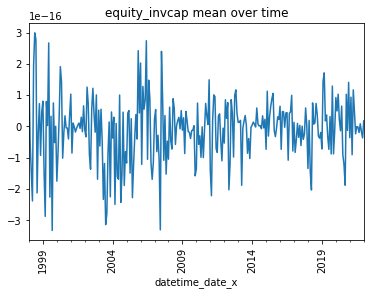

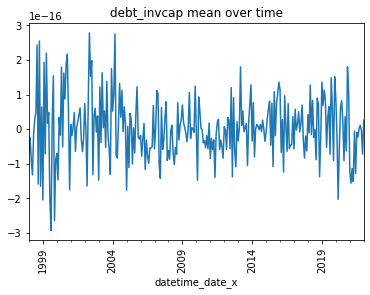

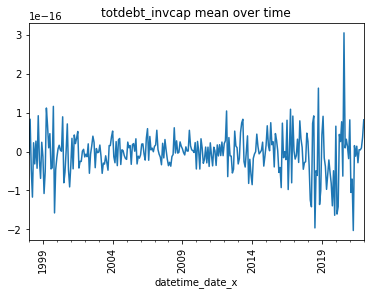

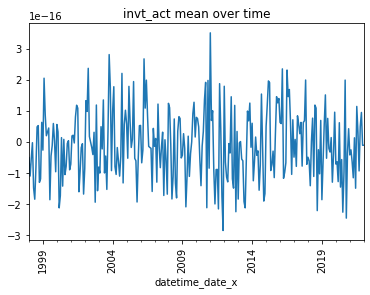

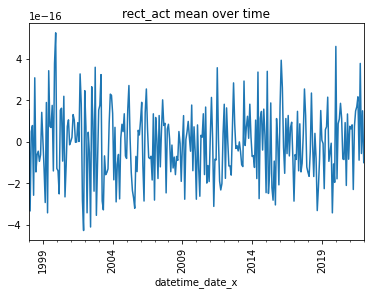

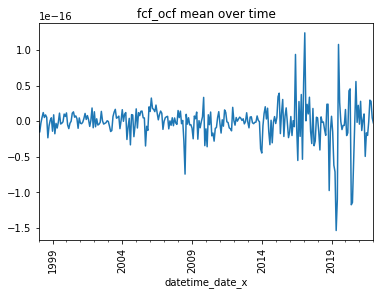

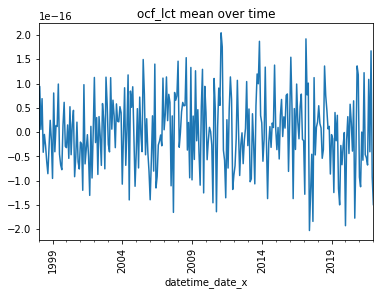

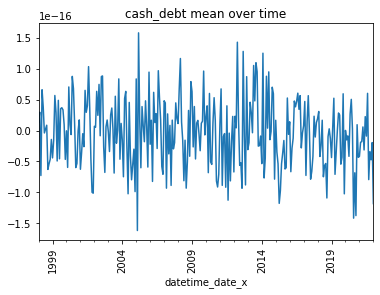

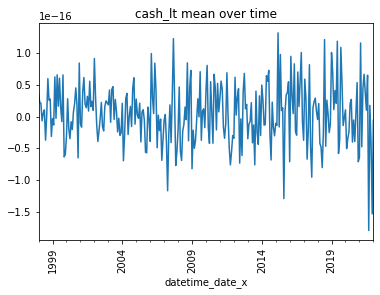

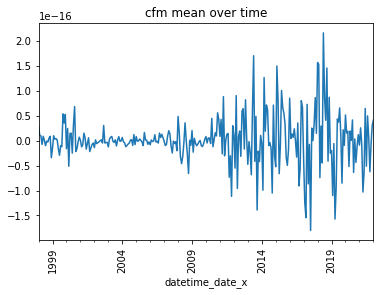

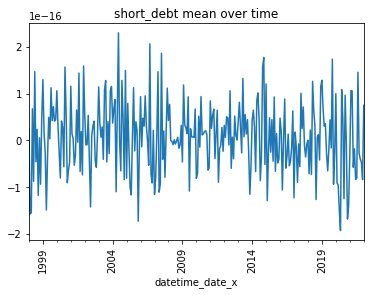

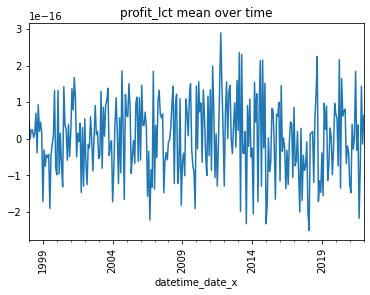

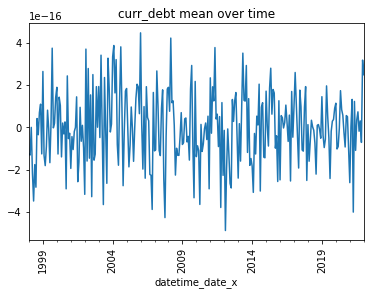

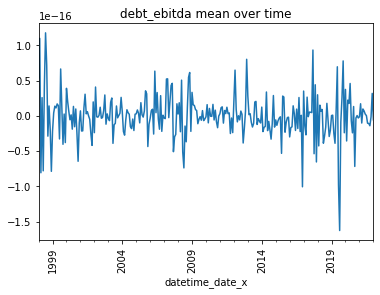

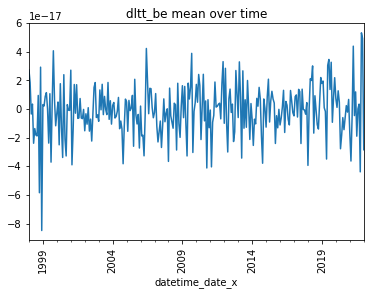

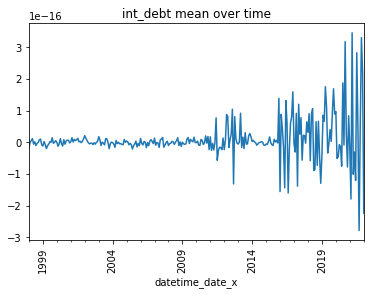

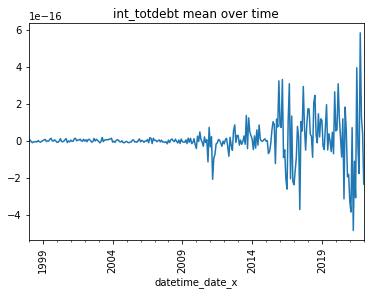

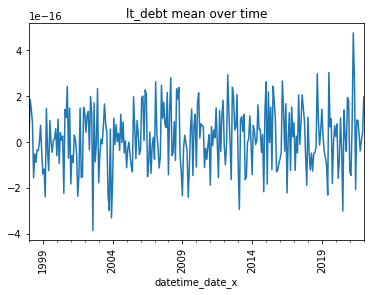

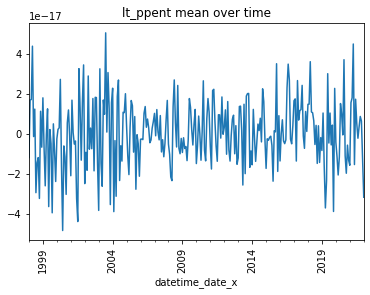

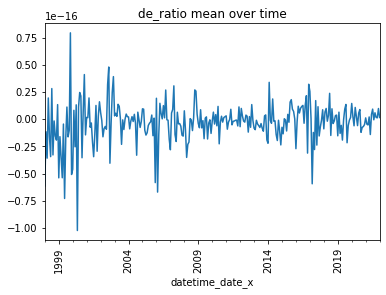

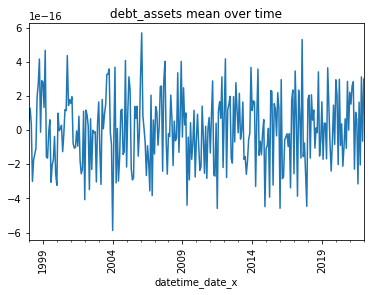

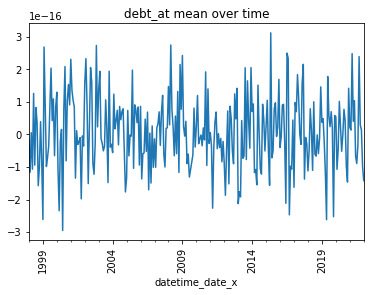

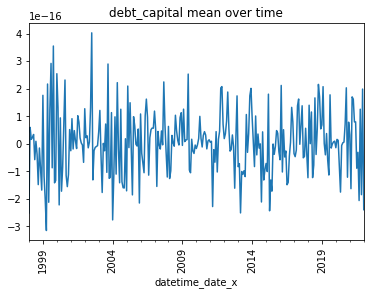

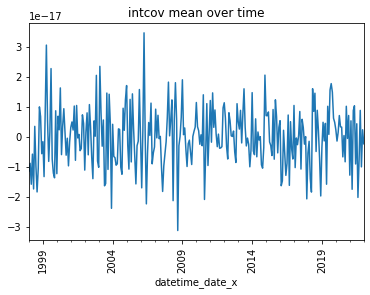

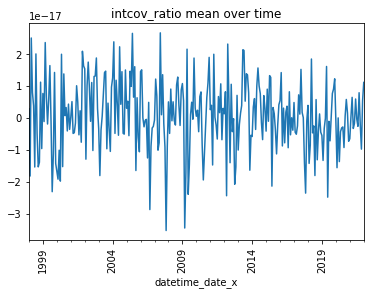

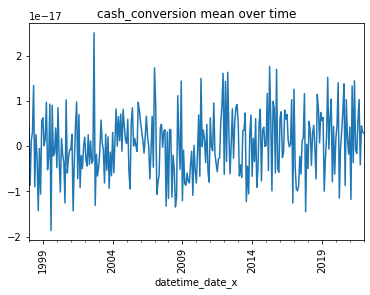

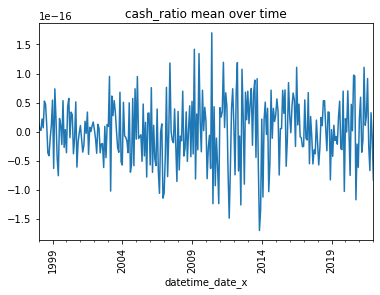

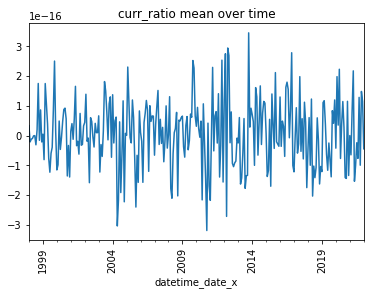

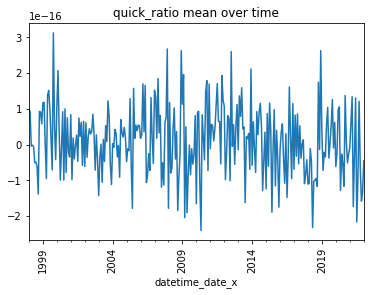

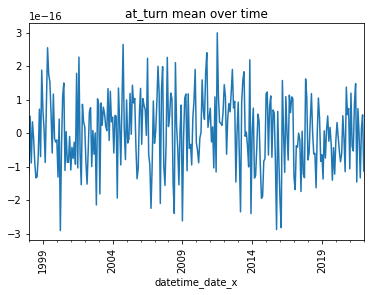

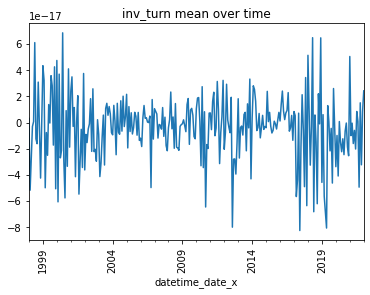

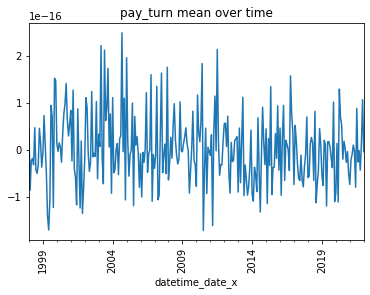

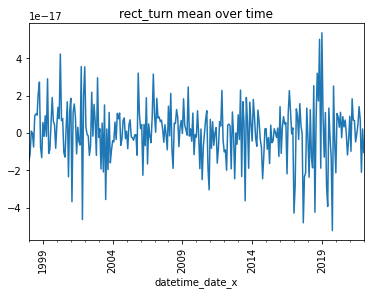

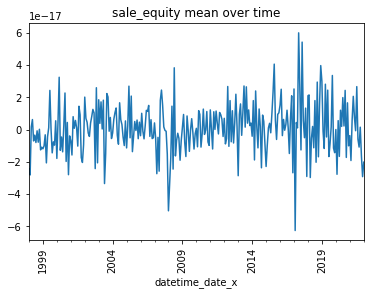

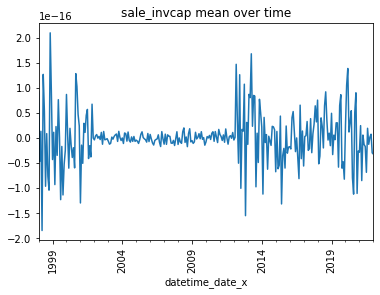

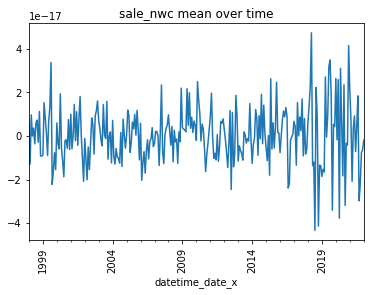

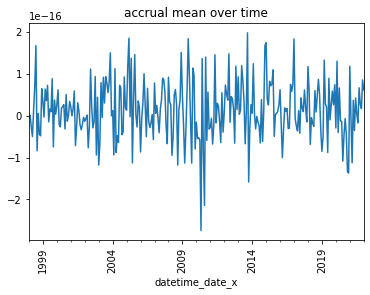

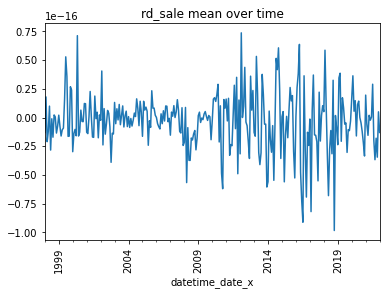

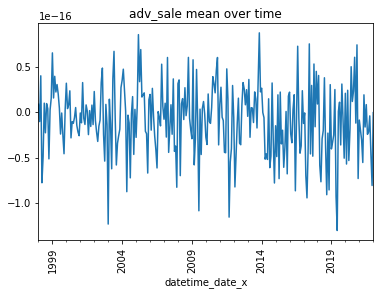

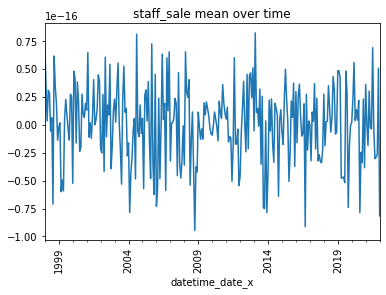

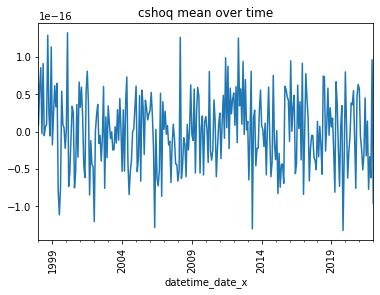

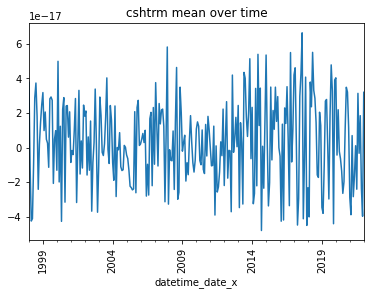

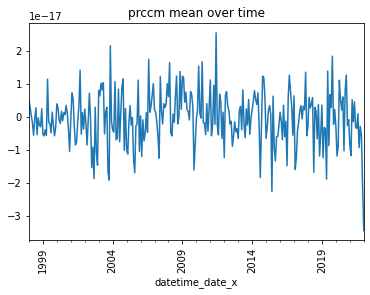

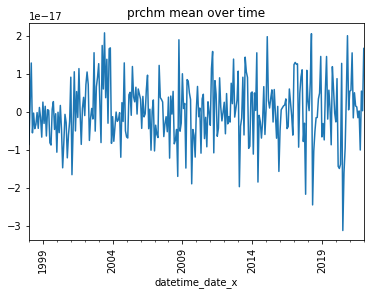

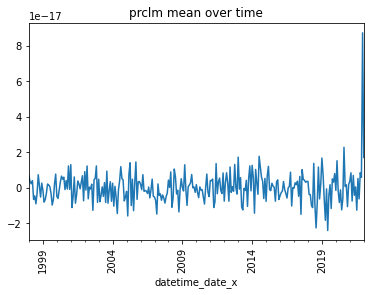

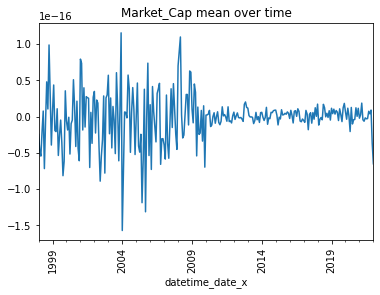

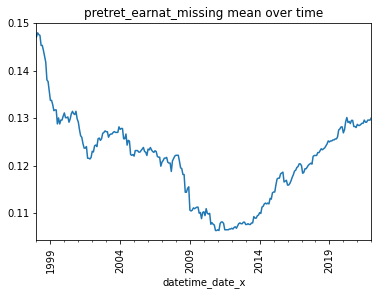

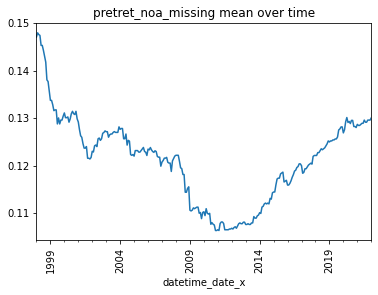

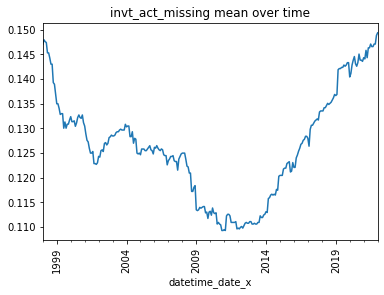

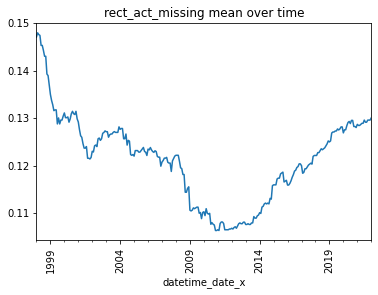

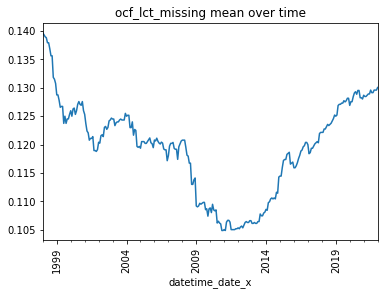

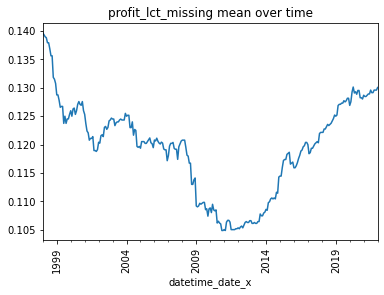

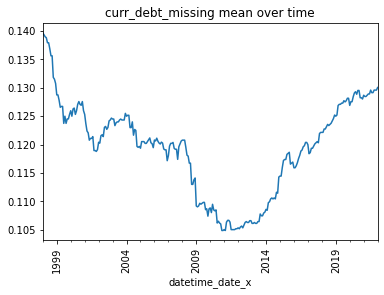

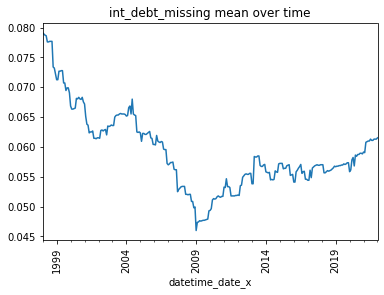

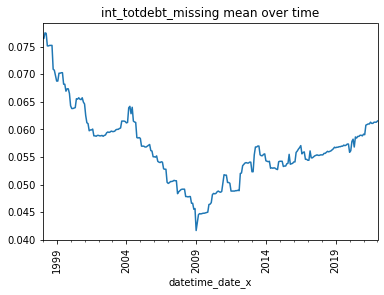

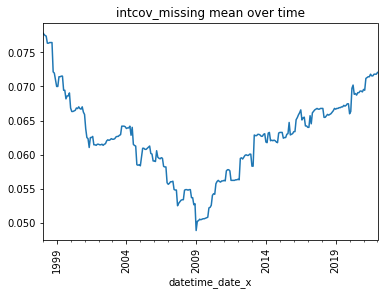

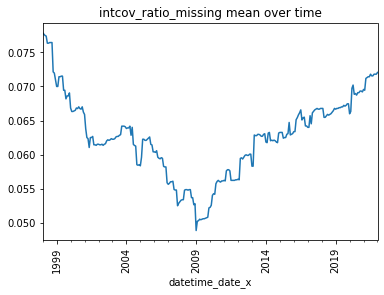

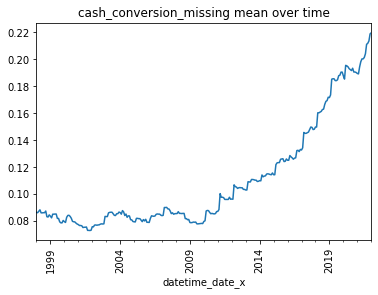

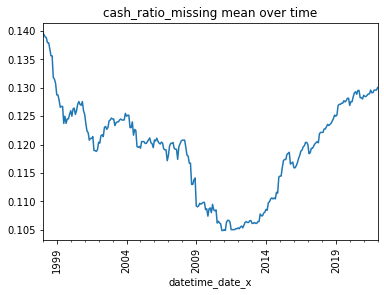

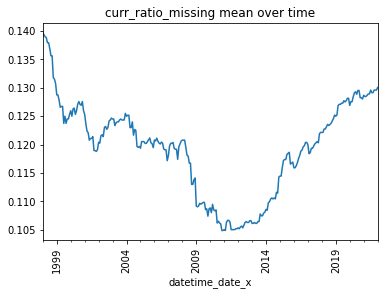

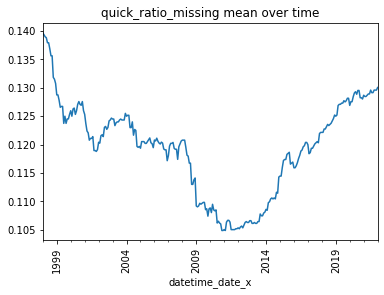

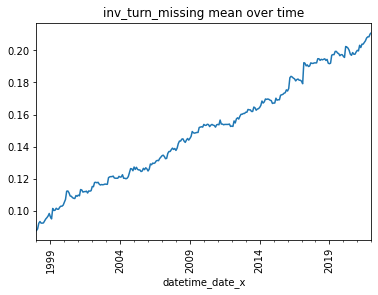

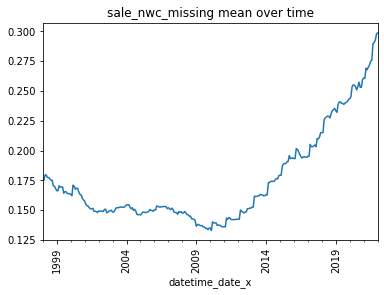

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
for variable in list_variable_non_macro:
    modeling_df_std.groupby("datetime_date_x")[variable].mean().plot(rot=90,title = variable + " mean over time")
    plt.show()

## Merge with macroeconomics factors

In [34]:
file_macro = r"merged_data_with_sp500.xlsx"
df_macro = pd.read_excel(file_macro)
sample_macro = df_macro.sample(100)

/tmp/ipykernel_5462/3677065255.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_macro = pd.read_sql(sql,cnxn)


In [35]:
df_macro = df_macro.drop(df_macro.columns[0], axis=1)
df_macro = df_macro.drop(columns=['sp500', 'sp500_return', 'sp500_risk'])
df_macro.head()

,date,Average weekly hours for manufacturing,4-Week Moving Average of Continued Claims,Manufacturers new orders for non-defense capital goods,Manufacturers new orders for consumer goods and materials,Building permits for new private housing units,Job Openings (Manufacturing),University of Michigan: Consumer Sentiment,"Average Weekly Hours of Production and Nonsupervisory Employees, Manufacturing",Employees on non-agricultural payrolls,Aggregate real person income (less transfer payment),Average Weeks Unemployed,Auto Inventory/Sales Ratio,Manufacturers Inventory/Sales Ratio,Total unit labor cost,Commercial and industrial loans outstanding,US dollar Index (Nominal Broad U.S. Dollar Index),US unemployment rate,Consumer Price Index (All Urban Items),Sticky Consumer Price Index,Producer Price Index by Industry (WPI),Federal Government Tax Income on Corporate,US Public debt,Retail sales,Personal income tax,Food Inflation (Consumer Price Index for All Urban Consumers: Food in U.S. City Average),Energy Inflation (Consumer Price Index for All Urban Consumers: Energy in U.S. City Average),CBOE Volatility Index (VIX),Industrial Output,Interest Rates,Call Money/Interbank Rate for the United States,Economic Policy Uncertainty Index for United States,Coincident Economic Activity Index for the United States,Weekly Economic Index (Lewis-Mertens-Stock),"Security Brokers and Dealers; Margin Accounts at Brokers and Dealers; Asset, Level",Velocity of M2 Money Stock,15-Year Fixed Rate Mortgage Average in the United States,"Real Estate Loans: Residential Real Estate Loans: Revolving Home Equity Loans, All Commercial Banks",Federal Government: Current Expenditures,Imports of Goods and Services,Export Price Index (End Use): All Commodities,Loan Performance: Total Loans and Leases: Noncurrent Rate,Equity Market Volatility Tracker: Overall,Federal government current tax receipts,Labor Force Participation Rate,M1,US Population,Bank Prime Loan Rate,M2,"Bank Credit, All Commercial Banks",Currency in Circulation,10-Year Treasury Constant Maturity Minus Federal Funds Rate,Rent Inflation Rate,US GDP Growth Rate
0,1998-01-31,0.000084,-0.018418,0.032049,-0.015069,0.067995,0.008026,0.044074,-0.002381,0.002104,0.008797,-0.018868,0.166385,0.022059,0.000986,0.012423,-0.000395,-0.021277,0.001236,-0.017717,0.002985,-0.015101,0.007276,0.001447,0.0,0.005041,-0.020947,-0.008314,0.004491,-0.027244,0.010909,0.612742,0.003903,0.01342,0.067751,-0.006410,0.021341,0.000946,-0.010106,0.011878,-0.006863,-0.000556,0.245974,0.017358,-0.001488,0.001585,0.000849,0.0,-0.008832,-0.001099,-0.001059,-2.0000,0.249390,0.011473
1,1998-02-28,0.000084,0.001013,0.030231,0.015583,0.059164,0.008026,0.035647,-0.004773,0.001650,0.006312,-0.012821,-0.031137,-0.021583,0.000986,0.007875,-0.000395,0.000000,0.000000,-0.213322,0.002985,-0.015101,0.007276,-0.000544,0.0,-0.000627,-0.022326,-0.004294,0.001657,-0.022263,-0.008993,0.461634,0.002885,0.01342,0.067751,-0.006410,0.015175,-0.000560,-0.010106,0.011878,-0.002962,-0.000556,-0.377242,0.017358,0.000000,0.003538,0.000768,0.0,-0.001078,0.002307,-0.006808,0.2500,-0.002361,0.011473
2,1998-03-31,0.000084,0.000676,-0.036066,-0.007982,-0.025501,0.008026,-0.035326,-0.002398,0.001160,0.005738,-0.058442,-0.008969,0.007353,0.000986,0.004279,-0.000395,0.021739,0.000000,0.283883,0.002985,-0.015101,0.007276,0.006108,0.0,0.001882,-0.017127,-0.017843,0.000411,0.027166,-0.003630,-0.764396,0.002501,0.01342,0.067751,-0.006410,-0.001493,-0.003317,-0.010106,0.011878,-0.002970,-0.000556,-0.104165,0.017358,0.000000,-0.000835,0.000844,0.0,-0.000097,0.001504,0.004627,-3.1000,0.247055,0.011473
3,1998-04-30,0.000084,-0.007165,0.047617,-0.010502,-0.036137,0.008026,0.020657,-0.009615,0.002261,0.003153,0.013793,-0.037330,0.014599,0.014600,-0.001987,-0.000395,-0.085106,0.001235,-0.107675,0.002985,-0.018862,0.000994,0.013285,0.0,0.000000,-0.008712,-0.070237,0.003624,-0.002260,-0.007286,0.049390,0.004741,0.01342,0.081780,-0.006912,-0.004405,0.000437,0.007418,0.010371,-0.003972,-0.

In [36]:
modeling_df_std['datetime_date_x'] = pd.to_datetime(modeling_df_std['datetime_date_x'], format='%Y-%m-%d')
df_macro['date'] = pd.to_datetime(df_macro['date'], format='%Y-%m-%d')

In [37]:
pd.set_option('display.max_columns', None)
# Merge monthly data with macro data on date
merged_df = pd.merge(modeling_df_std, df_macro, left_on="datetime_date_x", right_on="date", how = 'left')
merged_df = merged_df.drop(columns=['date'])
merged_df = merged_df.rename(columns={'datetime_date_x': 'date'})

merged_df.sort_values(by=['gvkey', 'date'], inplace=True)
merged_df.reset_index(inplace=True)
merged_df.drop(columns='index',inplace=True)
merged_df.head(10)

,gvkey,month,year,date,ggroup,gsubind,conm,dpr,PEG_trailing,bm,CAPEI,divyield,evm,pcf,pe_exi,pe_inc,pe_op_basic,pe_op_dil,ps,ptb,efftax,GProf,aftret_eq,aftret_equity,aftret_invcapx,gpm,npm,opmad,opmbd,pretret_earnat,pretret_noa,ptpm,roa,roce,roe,capital_ratio,equity_invcap,debt_invcap,totdebt_invcap,invt_act,rect_act,fcf_ocf,ocf_lct,cash_debt,cash_lt,cfm,short_debt,profit_lct,curr_debt,debt_ebitda,dltt_be,int_debt,int_totdebt,lt_debt,lt_ppent,de_ratio,debt_assets,debt_at,debt_capital,intcov,intcov_ratio,cash_conversion,cash_ratio,curr_ratio,quick_ratio,at_turn,inv_turn,pay_turn,rect_turn,sale_equity,sale_invcap,sale_nwc,accrual,rd_sale,adv_sale,staff_sale,cshoq,cshtrm,prccm,prchm,prclm,trt1m,Market_Cap,pretret_earnat_missing,pretret_noa_missing,invt_act_missing,rect_act_missing,ocf_lct_missing,profit_lct_missing,curr_debt_missing,int_debt_missing,int_totdebt_missing,intcov_missing,intcov_ratio_missing,cash_conversion_missing,cash_ratio_missing,curr_ratio_missing,quick_ratio_missing,inv_turn_missing,sale_nwc_missing,Market_Cap_missing,Average weekly hours for manufacturing,4-Week Moving Average of Continued Claims,Manufacturers new orders for non-defense capital goods,Manufacturers new orders for consumer goods and materials,Building permits for new private housing units,Job Openings (Manufacturing),University of Michigan: Consumer Sentiment,"Average Weekly Hours of Production and Nonsupervisory Employees, Manufacturing",Employees on non-agricultural payrolls,Aggregate real person income (less transfer payment),Average Weeks Unemployed,Auto Inventory/Sales Ratio,Manufacturers Inventory/Sales Ratio,Total unit labor cost,Commercial and industrial loans outstanding,US dollar Index (Nominal Broad U.S. Dollar Index),US unemployment rate,Consumer Price Index (All Urban Items),Sticky Consumer Price Index,Producer Price Index by Industry (WPI),Federal Government Tax Income on Corporate,US Public debt,Retail sales,Personal income tax,Food Inflation (Consumer Price Index for All Urban Consumers: Food in U.S. City Average),Energy Inflation (Consumer Price Index for All Urban Consumers: Energy in U.S. City Average),CBOE Volatility Index (VIX),Industrial Output,Interest Rates,Call Money/Interbank Rate for the United States,Economic Policy Uncertainty Index for United States,Coincident Economic Activity Index for the United States,Weekly Economic Index (Lewis-Mertens-Stock),"Security Brokers and Dealers; Margin Accounts at Brokers and Dealers; Asset, Level",Velocity of M2 Money Stock,15-Year Fixed Rate Mortgage Average in the United States,"Real Estate Loans: Residential Real Estate Loans: Revolving Home Equity Loans, All Commercial Banks",Federal Government: Current Expenditures,Imports of Goods and Services,Export Price Index (End Use): All Commodities,Loan Performance: Total Loans and Leases: Noncurrent Rate,Equity Market Volatility Tracker: Overall,Federal government current tax receipts,Labor Force Participation Rate,M1,US Population,Bank Prime Loan Rate,M2,"Bank Credit, All Commercial Banks",Currency in Circulation,10-Year Treasury Constant Maturity Minus Federal Funds Rate,Rent Inflation Rate,US GDP Growth Rate
0,1013.0,12.0,1997.0,1998-01-31,Technology Hardware & Equipment,45201020.0,ADC TELECOMMUNICATIONS INC,0.0,-0.072822,-0.709247,0.092411,0.0,0.378444,1.072618,0.487501,0.595463,0.400361,0.188762,0.391841,0.576265,-0.030999,0.927603,0.063800,0.057228,0.235068,0.231898,0.091025,0.067268,0.048005,0.715677,-0.029611,0.104163,0.897274,0.213551,0.061375,-1.291015,1.182409,-1.274515,-0.684236,0.159391,0.299715,0.034140,-0.182501,0.536307,0.165755,0.058232,-0.336362,0.626497,2.082648,-0.698567,-0.345675,-0.043574,-0.039953,-1.298409,-0.255073,-0.399279,-1.801552,-1.343049,-1.520812,0.436050,0.558565,-0.048135,0.004045,0.671935,0.418084,0.392972,-0.256437,0.108765,-0.147627,-0.101257,-0.161243,-0.058400,0.958863,0.101364,-0.343875,-0.454546,-0.222684,2.374066,-0.427116,-0.121678,-0.436674,-54.3401,-0.352810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [38]:
merged_df.shape

(200488, 154)

In [39]:
# validating that we have no missing left
merged_df.isna().sum()

gvkey                                                                                                  0
month                                                                                                  0
year                                                                                                   0
date                                                                                                   0
ggroup                                                                                                 0
gsubind                                                                                                0
conm                                                                                                   0
dpr                                                                                                    0
PEG_trailing                                                                                           0
bm                                                     

## reset the position for target variables

In [40]:
trt1m = merged_df.pop('trt1m')
# insert the column at the new position
merged_df.insert(len(merged_df.columns), 'trt1m', trt1m)

/tmp/ipykernel_5462/1717832736.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df.insert(len(merged_df.columns), 'trt1m', trt1m)


In [41]:
merged_df.head()

,gvkey,month,year,date,ggroup,gsubind,conm,dpr,PEG_trailing,bm,CAPEI,divyield,evm,pcf,pe_exi,pe_inc,pe_op_basic,pe_op_dil,ps,ptb,efftax,GProf,aftret_eq,aftret_equity,aftret_invcapx,gpm,npm,opmad,opmbd,pretret_earnat,pretret_noa,ptpm,roa,roce,roe,capital_ratio,equity_invcap,debt_invcap,totdebt_invcap,invt_act,rect_act,fcf_ocf,ocf_lct,cash_debt,cash_lt,cfm,short_debt,profit_lct,curr_debt,debt_ebitda,dltt_be,int_debt,int_totdebt,lt_debt,lt_ppent,de_ratio,debt_assets,debt_at,debt_capital,intcov,intcov_ratio,cash_conversion,cash_ratio,curr_ratio,quick_ratio,at_turn,inv_turn,pay_turn,rect_turn,sale_equity,sale_invcap,sale_nwc,accrual,rd_sale,adv_sale,staff_sale,cshoq,cshtrm,prccm,prchm,prclm,Market_Cap,pretret_earnat_missing,pretret_noa_missing,invt_act_missing,rect_act_missing,ocf_lct_missing,profit_lct_missing,curr_debt_missing,int_debt_missing,int_totdebt_missing,intcov_missing,intcov_ratio_missing,cash_conversion_missing,cash_ratio_missing,curr_ratio_missing,quick_ratio_missing,inv_turn_missing,sale_nwc_missing,Market_Cap_missing,Average weekly hours for manufacturing,4-Week Moving Average of Continued Claims,Manufacturers new orders for non-defense capital goods,Manufacturers new orders for consumer goods and materials,Building permits for new private housing units,Job Openings (Manufacturing),University of Michigan: Consumer Sentiment,"Average Weekly Hours of Production and Nonsupervisory Employees, Manufacturing",Employees on non-agricultural payrolls,Aggregate real person income (less transfer payment),Average Weeks Unemployed,Auto Inventory/Sales Ratio,Manufacturers Inventory/Sales Ratio,Total unit labor cost,Commercial and industrial loans outstanding,US dollar Index (Nominal Broad U.S. Dollar Index),US unemployment rate,Consumer Price Index (All Urban Items),Sticky Consumer Price Index,Producer Price Index by Industry (WPI),Federal Government Tax Income on Corporate,US Public debt,Retail sales,Personal income tax,Food Inflation (Consumer Price Index for All Urban Consumers: Food in U.S. City Average),Energy Inflation (Consumer Price Index for All Urban Consumers: Energy in U.S. City Average),CBOE Volatility Index (VIX),Industrial Output,Interest Rates,Call Money/Interbank Rate for the United States,Economic Policy Uncertainty Index for United States,Coincident Economic Activity Index for the United States,Weekly Economic Index (Lewis-Mertens-Stock),"Security Brokers and Dealers; Margin Accounts at Brokers and Dealers; Asset, Level",Velocity of M2 Money Stock,15-Year Fixed Rate Mortgage Average in the United States,"Real Estate Loans: Residential Real Estate Loans: Revolving Home Equity Loans, All Commercial Banks",Federal Government: Current Expenditures,Imports of Goods and Services,Export Price Index (End Use): All Commodities,Loan Performance: Total Loans and Leases: Noncurrent Rate,Equity Market Volatility Tracker: Overall,Federal government current tax receipts,Labor Force Participation Rate,M1,US Population,Bank Prime Loan Rate,M2,"Bank Credit, All Commercial Banks",Currency in Circulation,10-Year Treasury Constant Maturity Minus Federal Funds Rate,Rent Inflation Rate,US GDP Growth Rate,trt1m
0,1013.0,12.0,1997.0,1998-01-31,Technology Hardware & Equipment,45201020.0,ADC TELECOMMUNICATIONS INC,0.0,-0.072822,-0.709247,0.092411,0.0,0.378444,1.072618,0.487501,0.595463,0.400361,0.188762,0.391841,0.576265,-0.030999,0.927603,0.063800,0.057228,0.235068,0.231898,0.091025,0.067268,0.048005,0.715677,-0.029611,0.104163,0.897274,0.213551,0.061375,-1.291015,1.182409,-1.274515,-0.684236,0.159391,0.299715,0.034140,-0.182501,0.536307,0.165755,0.058232,-0.336362,0.626497,2.082648,-0.698567,-0.345675,-0.043574,-0.039953,-1.298409,-0.255073,-0.399279,-1.801552,-1.343049,-1.520812,0.436050,0.558565,-0.048135,0.004045,0.671935,0.418084,0.392972,-0.256437,0.108765,-0.147627,-0.101257,-0.161243,-0.058400,0.958863,0.101364,-0.343875,-0.454546,-0.222684,2.374066,-0.427116,-0.121678,-0.436674,-0.352810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [42]:
merged_df.to_csv('macro_fundamental_merged.csv', index=False)